# データを読み込む

In [2]:
from sklearn.datasets import load_files
train_review = load_files('/Users/suzukiyuuta/Downloads/aclImdb 2/train', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target
test_review = load_files('/Users/suzukiyuuta/Downloads/aclImdb 2/test', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target
# ラベルの0,1と意味の対応の表示
print(train_review.target_names)

['neg', 'pos', 'unsup']


In [3]:
import numpy as np
np.where(y_train==2)

(array([    0,     1,     2, ..., 74997, 74998, 74999]),)

In [4]:
# y_train=2となっているデータを削除
x_train = np.delete(x_train,np.where(y_train==2))
y_train = np.delete(y_train,np.where(y_train==2))

In [5]:
x_train.shape

(25000,)

In [6]:
print("x : {}".format(x_train[0]))

x : Dan Katzir has produced a wonderful film that takes us on a roller-coaster ride through a real romance set in the troubles surrounding modern Israel.<br /><br />For anyone who's ever been in love, the film brings back the uncertainties, the insecurities and heartache that make love so bitter-sweet. The atmosphere of fear and isolation that came with the difficult times in Israel at that time just serve to intensify the feeling. Instantly, you are drawn in to Dan's plight, and you can't fail to be deeply moved.<br /><br />You can't write drama and passion like this - the contrast between the realities of Dan's desperate, snatched relationship with Iris, and the realities of a state in turmoil make this eminently watchable. If you have an ounce of passion, and have ever been in love, see this film.


In [7]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset)).toarray()
# DataFrameにまとめる
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


In [9]:
# ngram_rangeで利用するn-gramの範囲を指定する
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


# 【問題1】BoWのスクラッチ実装

以下の3文のBoWを求められるプログラムをscikit-learnを使わずに作成してください。1-gramと2-gramで計算してください。<br>
This movie is SOOOO funny!!!<br>
What a movie! I never<br>
best movie ever!!!!! this movie<br>

In [10]:
sentence1 = "This movie is SOOOO funny!!!"
sentence2 = "What a movie! I never"
sentence3 = "best movie ever!!!!! this movie"

In [11]:
# スペースで分割するテスト
sentence1.split()

['This', 'movie', 'is', 'SOOOO', 'funny!!!']

In [12]:
# 小文字に変換する分割するテスト
sentence1.lower()

'this movie is soooo funny!!!'

In [13]:
import numpy as np

In [14]:
import re
import string
def format_text(text,length):
    kigo = string.punctuation#記号を定義
#     print(kigo)
#     !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
    table = str.maketrans( '', '',kigo)
    text = text.translate(table)#定義した記号を削除
    text = re.sub(r'[︰-＠]', "", text)#全角記号を削除
    text = re.sub('\n', " ", text)#改行文字を削除
    text = text.lower().split()# 小文字に変換し削除
    if length == 1:#length =1の処理
        result = text
    elif length == 2:#length =２の処理
        result = []
        for i in range(len(text) - 1):
            result.append((str(text[i]) + " " + str(text[i+1])))
        result
    else:
        print(unkown)

    return result 
print(type(np.array(format_text(sentence1,1))))
print(format_text(sentence1,2))


<class 'numpy.ndarray'>
['this movie', 'movie is', 'is soooo', 'soooo funny']


In [15]:
#ユニークな語彙の出力
def word_list(dataset,length=1):
    vocabulary = np.empty(0)
    for i in range(len(dataset)): 
#         print(vocabulary)
        vocabulary = np.append(vocabulary,(format_text(dataset[i],length)))
    vocabulary = np.unique(vocabulary)
    return vocabulary

In [16]:
word_list(mini_dataset)
word_list(mini_dataset,2)

array(['a good', 'bad very', 'film is', 'is a', 'is very', 'movie is',
       'this film', 'this movie', 'very bad', 'very good', 'very very'],
      dtype='<U32')

In [17]:
# ngramのスクラッチ

def ngram(dataset,length=1):
    #ユニークな語彙リストを作成
    vocabulary = np.empty(0)
    for i in range(len(dataset)): 
#         print(vocabulary)
        vocabulary = np.append(vocabulary,(format_text(dataset[i],length)))
    vocabulary = np.unique(vocabulary)
    word_vectol = np.zeros((len(dataset),len(vocabulary)))
    for j in range(word_vectol.shape[0]): 
        for k in range(word_vectol.shape[1]): 
#             print(dataset[j])
            word_vectol[j,k] = np.sum(np.array(format_text(dataset[j],length)) == vocabulary[k])
    return word_vectol,vocabulary

In [18]:
#ngram1
ngram(mini_dataset)

(array([[0., 0., 0., 1., 1., 1., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 0.],
        [0., 2., 0., 0., 0., 0., 0., 3.]]),
 array(['a', 'bad', 'film', 'good', 'is', 'movie', 'this', 'very'],
       dtype='<U32'))

In [19]:
#ngram2
vectol,vocabulary = ngram(mini_dataset,2)
print(vectol)
print(vocabulary)


[[0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 2. 0. 1.]]
['a good' 'bad very' 'film is' 'is a' 'is very' 'movie is' 'this film'
 'this movie' 'very bad' 'very good' 'very very']


In [20]:
#ngram2にコラムを追加しパンダスで表示
df = pd.DataFrame(vectol, columns=vocabulary)
display(df)

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0


In [21]:
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

<Figure size 640x480 with 1 Axes>

# 【問題2】TF-IDFの計算

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(token_pattern=r'\b\w+\b', max_features = 5000)
# vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5000)
bow_train = (vectorizer.fit_transform(x_train)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,0,00,000,1,10,100,11,12,13,13th,...,younger,your,yourself,youth,z,zero,zizek,zombie,zombies,zone
0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.061435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.024081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.040178,0.0,0.0,0.125188,0.310339,0.0,0.0,0.0,0.0,0.0,...,0.0,0.019090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24996,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24997,0.000000,0.0,0.0,0.000000,0.018424,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24998,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df.shape

(25000, 5000)

# 【問題3】TF-IDFを用いた学習

In [24]:
vectorizer = TfidfVectorizer(token_pattern=r'\b\w+\b', max_features = 5000)
# vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5000)
bow_test = (vectorizer.fit_transform(x_test)).toarray()

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(bow_train, y_train)

y_pred = model.predict(bow_test)
# print(log_y_pred)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
from sklearn.metrics import roc_auc_score
print('auc = ', roc_auc_score(y_true=y_test, y_score=y_pred))

auc =  0.5986


# 【問題4】TF-IDFのスクラッチ実装

$$tf(t,d) = \frac{n_{t,d}}{\sum_{s \in d}n_{s,d}}$$
$$idf(t) = \log{\frac{N}{df(t)}}$$
$$tfidf(t, d) = tf(t, d) \times idf(t)$$

In [37]:
#Term Frequency:
def Term_Frequency(dataset,length=1):
    #ユニークな語彙リストを作成
    vocabulary = np.empty(0)
    for i in range(len(dataset)): 
#         print(vocabulary)
        vocabulary = np.append(vocabulary,(format_text(dataset[i],length)))
    vocabulary = np.unique(vocabulary)
    word_vectol = np.zeros((len(dataset),len(vocabulary)))
    for j in range(word_vectol.shape[0]): 
        for k in range(word_vectol.shape[1]): 
#             print(dataset[j])
            word_vectol[j,k] = np.sum(np.array(format_text(dataset[j],length)) == vocabulary[k])
    tf = word_vectol/np.sum(word_vectol, axis=0)
    return tf,vocabulary


In [38]:
tf,vocabulary = Term_Frequency(mini_dataset,2)
print(tf)

[[0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.]]


In [47]:
#Inverse Document Frequency:
def Inverse_Document_Frequency(dataset,length=1):
    #ユニークな語彙リストを作成
    vocabulary = np.empty(0)
    for i in range(len(dataset)): 
#         print(vocabulary)
        vocabulary = np.append(vocabulary,(format_text(dataset[i],length)))
    vocabulary = np.unique(vocabulary)
    word_vectol = np.zeros((len(dataset),len(vocabulary)))
    for j in range(word_vectol.shape[0]): 
        for k in range(word_vectol.shape[1]): 
#             print(dataset[j])
            word_vectol[j,k] = np.sum(np.array(format_text(dataset[j],length)) == vocabulary[k])
    idf = np.log(len(dataset)/np.count_nonzero(word_vectol != 0, axis=0))
    return idf,vocabulary

In [48]:
idf,vocabulary = Inverse_Document_Frequency(mini_dataset,2)
print(idf)

[1.09861229 1.09861229 1.09861229 1.09861229 1.09861229 1.09861229
 1.09861229 1.09861229 1.09861229 1.09861229 1.09861229]


In [49]:
def TF_IDF(dataset,length=1):
    #ユニークな語彙リストを作成
    vocabulary = np.empty(0)
    for i in range(len(dataset)): 
#         print(vocabulary)
        vocabulary = np.append(vocabulary,(format_text(dataset[i],length)))
    vocabulary = np.unique(vocabulary)
    word_vectol = np.zeros((len(dataset),len(vocabulary)))
    for j in range(word_vectol.shape[0]): 
        for k in range(word_vectol.shape[1]): 
#             print(dataset[j])
            word_vectol[j,k] = np.sum(np.array(format_text(dataset[j],length)) == vocabulary[k])
    tf = word_vectol/np.sum(word_vectol, axis=0)
    idf = np.log(len(dataset)/np.count_nonzero(word_vectol != 0, axis=0))
    tf_ide = tf*idf
    return tf_ide,vocabulary

In [50]:
tf_ide,vocabulary = TF_IDF(mini_dataset,2)
print(tf_ide)

[[0.         0.         0.         0.         1.09861229 1.09861229
  0.         1.09861229 0.         1.09861229 0.        ]
 [1.09861229 0.         1.09861229 1.09861229 0.         0.
  1.09861229 0.         0.         0.         0.        ]
 [0.         1.09861229 0.         0.         0.         0.
  0.         0.         1.09861229 0.         1.09861229]]


In [55]:
tf_ide,vocabulary = TF_IDF(x_test[0:20],1)
print(tf_ide[0])

[0. 0. 0. ... 0. 0. 0.]


In [60]:
print(tf_ide[1:,])

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.63237333 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [63]:
print(vocabulary.shape)

(1382,)


In [68]:
mini_dataset2 = np.append(sentence1,np.append(sentence2,sentence3))

In [70]:
print(mini_dataset2.shape)

(3,)


In [71]:
test,vocabulary = TF_IDF(mini_dataset2,1)
print(test)
print(vocabulary)

[[0.         0.         0.         1.09861229 0.         1.09861229
  0.         0.         1.09861229 0.20273255 0.        ]
 [1.09861229 0.         0.         0.         1.09861229 0.
  0.         1.09861229 0.         0.         1.09861229]
 [0.         1.09861229 1.09861229 0.         0.         0.
  0.         0.         0.         0.20273255 0.        ]]
['a' 'best' 'ever' 'funny' 'i' 'is' 'movie' 'never' 'soooo' 'this' 'what']


In [72]:
test,vocabulary = TF_IDF(mini_dataset2,2)
print(test)
print(vocabulary)

[[0.         0.         0.         0.         1.09861229 0.
  0.         1.09861229 1.09861229 0.20273255 0.        ]
 [1.09861229 0.         0.         1.09861229 0.         0.
  1.09861229 0.         0.         0.         1.09861229]
 [0.         1.09861229 1.09861229 0.         0.         1.09861229
  0.         0.         0.         0.20273255 0.        ]]
['a movie' 'best movie' 'ever this' 'i never' 'is soooo' 'movie ever'
 'movie i' 'movie is' 'soooo funny' 'this movie' 'what a']


$$tf(t,d) = n_{t,d}$$
$$idf(t) = \log{\frac{1+N}{1+df(t)}}+1$$

In [74]:
def TF_IDF_scikit_learn(dataset,length=1):
    #ユニークな語彙リストを作成
    vocabulary = np.empty(0)
    for i in range(len(dataset)): 
#         print(vocabulary)
        vocabulary = np.append(vocabulary,(format_text(dataset[i],length)))
    vocabulary = np.unique(vocabulary)
    word_vectol = np.zeros((len(dataset),len(vocabulary)))
    for j in range(word_vectol.shape[0]): 
        for k in range(word_vectol.shape[1]): 
#             print(dataset[j])
            word_vectol[j,k] = np.sum(np.array(format_text(dataset[j],length)) == vocabulary[k])
    tf = word_vectol
    idf = np.log((1 + len(dataset))/(1 + np.count_nonzero(word_vectol != 0, axis=0))) + 1
    tf_ide = tf*idf
    return tf_ide,vocabulary

In [76]:
test2,vocabulary = TF_IDF_scikit_learn(mini_dataset2,1)
print(test2)
print(vocabulary)

[[0.         0.         0.         1.69314718 0.         1.69314718
  1.         0.         1.69314718 1.28768207 0.        ]
 [1.69314718 0.         0.         0.         1.69314718 0.
  1.         1.69314718 0.         0.         1.69314718]
 [0.         1.69314718 1.69314718 0.         0.         0.
  2.         0.         0.         1.28768207 0.        ]]
['a' 'best' 'ever' 'funny' 'i' 'is' 'movie' 'never' 'soooo' 'this' 'what']


# Word2Vec

In [85]:
pip install --upgrade gensim

     |████████████████████████████████| 24.7MB 7.5MB/s eta 0:00:01    |██▉                             | 2.2MB 7.5MB/s eta 0:00:03
     |████████████████████████████████| 102kB 20.0MB/s ta 0:00:01
     |████████████████████████████████| 133kB 35.1MB/s eta 0:00:01
     |████████████████████████████████| 81kB 21.1MB/s eta 0:00:01
     |████████████████████████████████| 6.0MB 19.2MB/s eta 0:00:01
     |████████████████████████████████| 71kB 14.2MB/s eta 0:00:01
     |████████████████████████████████| 71kB 16.5MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-1.10.0-cp37-none-any.whl size=90634 sha256=b5533f93893619d40875505adce1d78c7fbc4c42cfb51fde79be1e7d229e2efc
  Stored in directory: /Users/suzukiyuuta/Library/Caches/pip/wheels/f8/00/d4/a6b8b6aa241459103d19e757f96645549dd562d5b5de653f44
Successfully built smart-open
Note: you may need to restart the kernel to use updated packages.


In [86]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) # 学習
print("語彙の一覧 : {}".format(model.wv.vocab.keys()))
for vocab in model.wv.vocab.keys():
  print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

語彙の一覧 : dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
thisのベクトル : 
[ 0.02154421  0.03779251 -0.0495244  -0.04862929 -0.03939386 -0.03648804
 -0.00222457  0.00070769 -0.03704559  0.0313438 ]
movieのベクトル : 
[-0.03342743  0.04805072 -0.00631991  0.00313309  0.00358155 -0.01445652
  0.04510969 -0.0166509  -0.01502874  0.0494482 ]
isのベクトル : 
[-0.04932674 -0.04710373  0.03114055  0.03478111 -0.00784382  0.04370856
 -0.02581905  0.03571375  0.00158427  0.02348363]
veryのベクトル : 
[-0.0255671   0.0026552  -0.02139049  0.00621876  0.01787879  0.0490632
  0.01796623  0.01471163 -0.00242447  0.04112181]
goodのベクトル : 
[ 0.02861802  0.00646891 -0.02462474 -0.01940044  0.00136437  0.03020944
 -0.01897266  0.04058674  0.02172497 -0.0373721 ]
filmのベクトル : 
[-0.04609689  0.03985596  0.01840504  0.02291715 -0.01984819  0.01995873
 -0.03141062 -0.02427859 -0.01045693  0.03896124]
aのベクトル : 
[-0.01800065 -0.03838257 -0.01957043  0.00098009  0.00788424  0.00202455
 -0.00219703  0.00985649

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


In [87]:
model.wv.most_similar(positive="good", topn=3)

[('a', 0.2557521164417267),
 ('bad', 0.2134658694267273),
 ('this', -0.0041904449462890625)]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


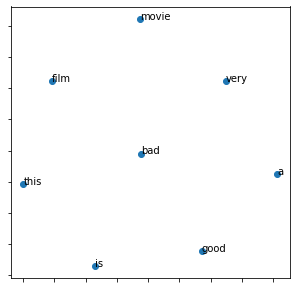

In [88]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vocabs = model.wv.vocab.keys()
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

# 【問題5】コーパスの前処理

In [80]:
# URLの除去を追加
def format_text(text,length):
    kigo = string.punctuation#記号を定義
#     print(kigo)
#     !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
    table = str.maketrans( '', '',kigo)
    text=re.sub(r'https?://[\w/:%#\$&\?\(\)~\.=\+\-…]+', "", text)#URLの除去←追加
    text=re.sub('URL', "", text)#URLの文字列←追加
    text = text.translate(table)#定義した記号を削除
    text = re.sub(r'[︰-＠]', "", text)#全角記号を削除
    text = re.sub('\n', " ", text)#改行文字を削除
    text = text.lower().split()# 小文字に変換し削除
    if length == 1:#length =1の処理
        result = text
    elif length == 2:#length =２の処理
        result = []
        for i in range(len(text) - 1):
            result.append((str(text[i]) + " " + str(text[i+1])))
        result
    else:
        print(unkown)

    return result 

In [81]:
# TF_IDF_scikit_learnを更新
def TF_IDF_scikit_learn(dataset,length=1):
    #ユニークな語彙リストを作成
    vocabulary = np.empty(0)
    for i in range(len(dataset)): 
#         print(vocabulary)
        vocabulary = np.append(vocabulary,(format_text(dataset[i],length)))
    vocabulary = np.unique(vocabulary)
    word_vectol = np.zeros((len(dataset),len(vocabulary)))
    for j in range(word_vectol.shape[0]): 
        for k in range(word_vectol.shape[1]): 
#             print(dataset[j])
            word_vectol[j,k] = np.sum(np.array(format_text(dataset[j],length)) == vocabulary[k])
    tf = word_vectol
    idf = np.log((1 + len(dataset))/(1 + np.count_nonzero(word_vectol != 0, axis=0))) + 1
    tf_ide = tf*idf
    return tf_ide,vocabulary

In [82]:
sentence4 = "This movie is SOOOO funny!!! URL https://note.nkmk.me/python-numpy-count/"
mini_dataset3 = np.append(mini_dataset2,sentence4)

In [83]:
#1行目と４行目が同じ結果になればOK
test3,vocabulary = TF_IDF_scikit_learn(mini_dataset3,1)
print(test3)
print(vocabulary)

[[0.         0.         0.         1.51082562 0.         1.51082562
  1.         0.         1.51082562 1.22314355 0.        ]
 [1.91629073 0.         0.         0.         1.91629073 0.
  1.         1.91629073 0.         0.         1.91629073]
 [0.         1.91629073 1.91629073 0.         0.         0.
  2.         0.         0.         1.22314355 0.        ]
 [0.         0.         0.         1.51082562 0.         1.51082562
  1.         0.         1.51082562 1.22314355 0.        ]]
['a' 'best' 'ever' 'funny' 'i' 'is' 'movie' 'never' 'soooo' 'this' 'what']


In [153]:
def token(dataset,length=1):
    token_dataset = []
    for i in range(len(dataset)): 
        token_dataset.append(format_text(dataset[i],length))
    return token_dataset

In [154]:
token(mini_dataset3)

[['this', 'movie', 'is', 'soooo', 'funny'],
 ['what', 'a', 'movie', 'i', 'never'],
 ['best', 'movie', 'ever', 'this', 'movie'],
 ['this', 'movie', 'is', 'soooo', 'funny']]

In [155]:
len(token(mini_dataset3))

4

# 【問題6】Word2Vecの学習

In [170]:
sentences2 = token(x_test[0:10])

In [171]:
model2 = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model2.build_vocab(sentences2) # 準備
model2.train(sentences2, total_examples=model.corpus_count, epochs=model.iter) # 学習

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(6350, 8770)

# 【問題7】（アドバンス課題）ベクトルの可視化

In [172]:
model2.wv.most_similar(positive="good", topn=3)

[('viewers', 0.8429011106491089),
 ('appeals', 0.7243204116821289),
 ('poor', 0.7231239080429077)]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


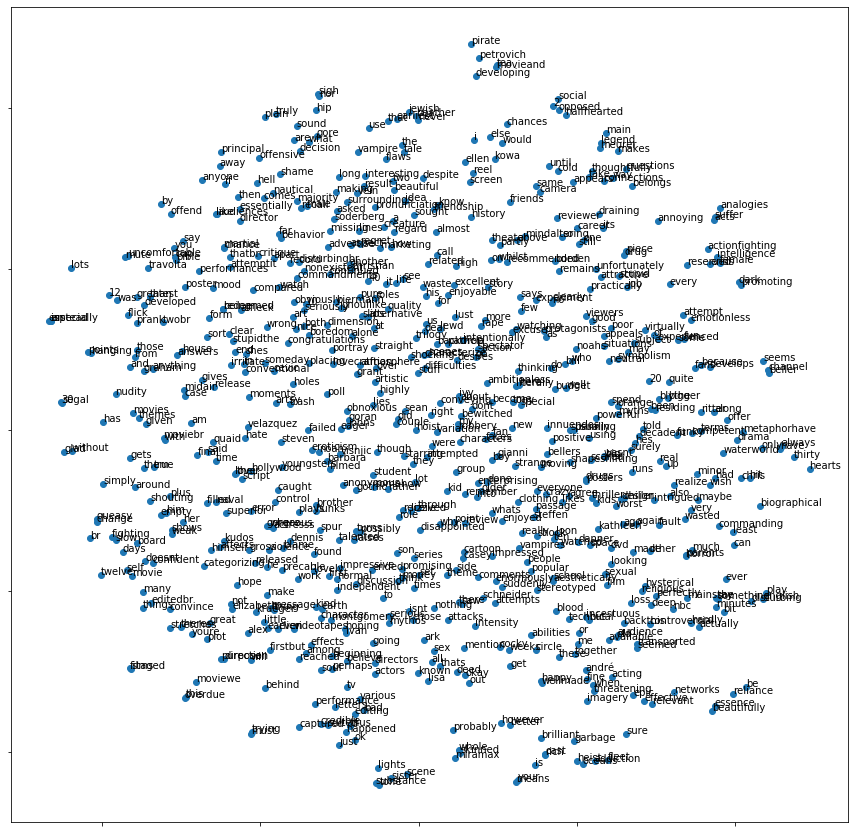

In [174]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vocabs = model2.wv.vocab.keys()
tsne_model2 = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne2 = tsne_model2.fit_transform(model2[vocabs])
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(vectors_tsne2[:, 0], vectors_tsne2[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne2[i, 0], vectors_tsne2[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()